<a href="https://colab.research.google.com/github/elliswu0918/Pandas_sideProject/blob/main/pandas_Side_Project_2024_%E5%90%B3%E8%B3%A2%E6%94%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Side Project
---
# 1.目的：專案分析【2個商業數據集】（A企業，B公司）

# 2.學號：111570007

# 3.姓名：吳賢政

# 4.學校系所：國立臺北科技大學 經營管理學系
---

---
# 一、分析第1個數據集：A企業的『進貨、銷貨、存貨』共10個資料表的綜合分析
# 檔案：https://acupun.site/lecture/pandas/example/resource/company2.xlsx

# 資料表：categories，customers，employees，orderdetails，orders，products，region，shippers，suppliers，territories

In [ ]:
#--------------------------------------
# colab繪圖顯示繁體中文
#--------------------------------------
import matplotlib
#colab顯示繁體中文 問題：matplotlib繪圖，會發生中文無法顯示的問題
# 先下載台北黑體字型
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download import matplotlib
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 將 font-family 設為 Taipei Sans TC Beta
# 設定完後，之後的圖表都可以顯示中文了
matplotlib.rc('font', family='Taipei Sans TC Beta')

/bin/bash: line 1: import: command not found
--2024-06-22 10:48:57--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.134.100, 74.125.134.102, 74.125.134.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-06-22 10:48:57--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.98.132, 2607:f8b0:400c:c1a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M   1

---
# **1.第1個分析：統計A企業的『逐年、逐月』的訂單金額，並繪柱狀圖**

下載檔案：https://acupun.site/lecture/pandas/example/resource/company2.xlsx

將檔案上傳到雲端硬碟，讀取自己雲端的檔案

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#(1)統計歷年訂單金額（小數點0位，加上千分位，加上表格標題）
# 補充：如何同時設定【小數點格式與千分位格式】：df.style.format({:,.1f}",subset=["欄位"]))
import pandas as pd
df1=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/company2.xlsx','categories')
df2=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/company2.xlsx','customers')
df3=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/company2.xlsx','employees')
df4=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/company2.xlsx','orderdetails')
df5=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/company2.xlsx','orders')
df6=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/company2.xlsx','products')
df7=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/company2.xlsx','region')
df8=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/company2.xlsx','shippers')
df9=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/company2.xlsx','suppliers')
df10=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/company2.xlsx','territories')


In [ ]:
#(1)統計歷年訂單金額（小數點0位，加上千分位，加上表格標題）
# 補充：如何同時設定【小數點格式與千分位格式】：df.style.format({:,.1f}",subset=["欄位"]))
df11=df4.merge(df5,on='OrderID')
df11['Year']=pd.to_datetime(df11['OrderDate'])
df11['Year']=df11['Year'].dt.year
df11['total']=df11['UnitPrice']*df11['Quantity']
df11=df11.groupby('Year').agg({'total':'sum'}).reset_index()\
.rename(columns={'Year':'年','total':'訂單金額'})\
.style.format('{:,.0f}',subset=['訂單金額'])\
.set_caption('表1-1：歷年訂單金額')
df11


,年,訂單金額
0,1996,"226,298"
1,1997,"658,389"
2,1998,"469,771"


<Axes: title={'center': '圖1-1:歷年訂單金額比較圖'}, xlabel='年'>

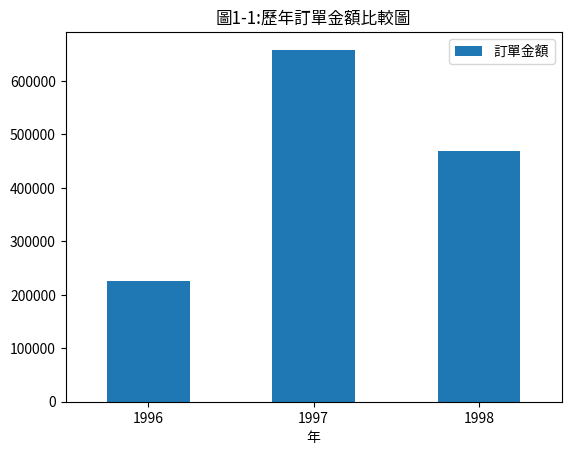

In [ ]:
#(2)【逐年】繪圖，加上圖形標題
import matplotlib.pyplot as plt
df11=df11.data
df11.plot(kind='bar',x='年',y='訂單金額',rot=0
        ,title='圖1-1:歷年訂單金額比較圖')


In [ ]:
#(3)統計此公司的『逐年、逐月』的銷售金額（小數點0位，加上千分位，加上表格標題）
# 補充：如何同時設定【小數點格式與千分位格式】：df.style.format({:,.1f}",subset=["欄位"]))
df11=df4.merge(df5,on='OrderID')
df11['Year']=pd.to_datetime(df11['OrderDate'])
df11['Year']=df11['Year'].dt.year
df11['month']=pd.to_datetime(df11['OrderDate'])
df11['month']=df11['month'].dt.month
df11['total']=df11['UnitPrice']*df11['Quantity']
df11=df11.groupby(['Year','month']).agg({'total':'sum'}).reset_index()\
.rename(columns={'month':'月','Year':'年','total':'訂單金額'})\
.style.format('{:,.0f}',subset=['訂單金額'])\
.set_caption('表1-2：逐年逐月訂單金額')
df12=df11.data
df11

,年,月,訂單金額
0,1996,7,"30,192"
1,1996,8,"26,609"
2,1996,9,"27,636"
3,1996,10,"41,204"
4,1996,11,"49,704"
5,1996,12,"50,953"
6,1997,1,"66,693"
7,1997,2,"41,207"
8,1997,3,"39,980"
9,1997,4,"55,699"


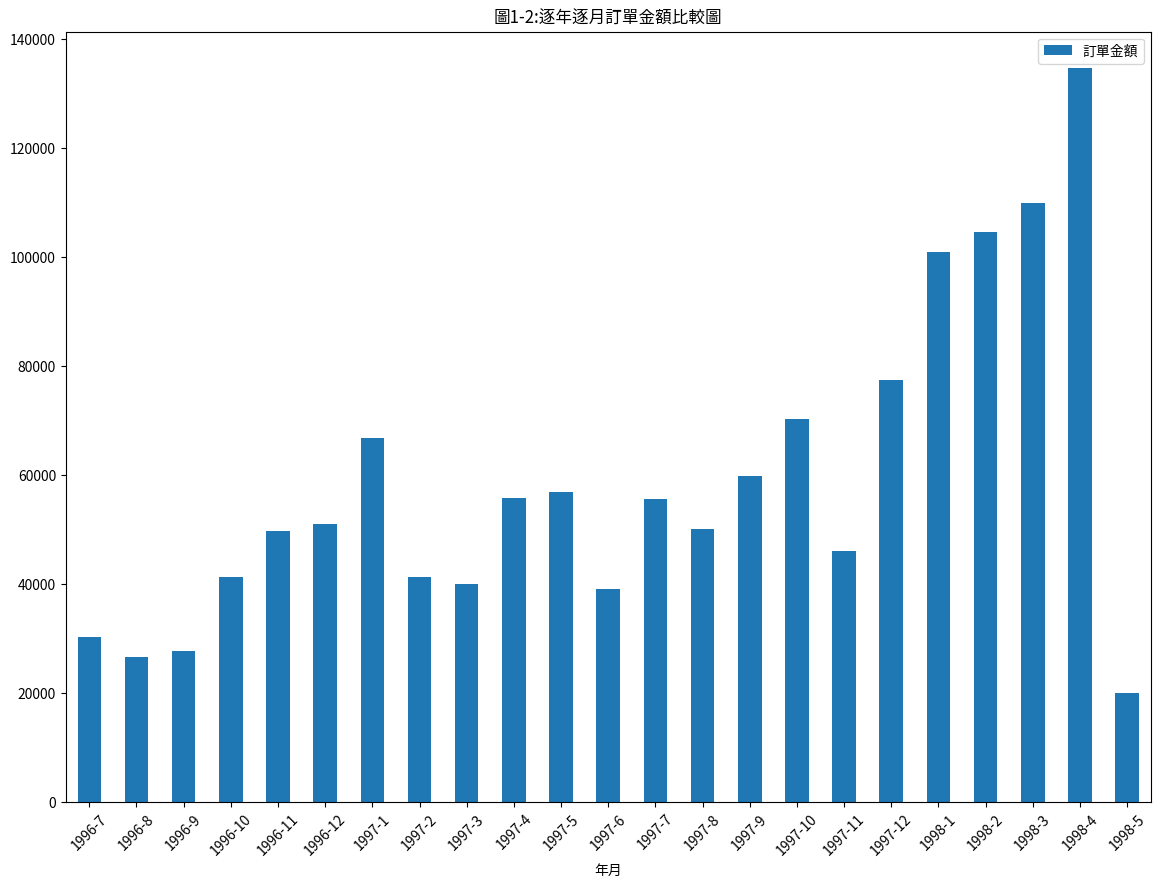

In [ ]:
#(4)【逐年逐月】繪圖，加上圖形標題
df12['年月']=df12['年'].astype(str)+'-'+df12['月'].astype(str)
df12.plot(kind='bar',legend=True,x='年月',y='訂單金額',figsize=(14,10),rot=45
        ,title='圖1-2:逐年逐月訂單金額比較圖')
plt.legend(loc='upper right')
plt.show()

---
# **2.第2個分析【產品數量頻數分析】：統計每個類別下的產品數量與佔比，並畫圖**

下載檔案：https://acupun.site/lecture/pandas/example/resource/company2.xlsx

將檔案上傳到雲端硬碟，讀取自己雲端的檔案

In [ ]:
#(1)統計每個類別下的產品量佔比
df12=df1.merge(df6,on='CategoryID')
df12=(df12.groupby('CategoryName').agg({'ProductName':'count'})/df12.groupby('CategoryName').agg({'ProductName':'count'}).sum())\
.reset_index()\
.rename(columns={'ProductName':'產品量佔比'})\
.style.set_caption('表1：統計各類別的產品量佔比')
df13=df12.data
df12

,CategoryName,產品量佔比
0,Beverages,0.155844
1,Condiments,0.155844
2,Confections,0.168831
3,Dairy Products,0.129870
4,Grains/Cereals,0.090909
5,Meat/Poultry,0.077922
6,Produce,0.064935
7,Seafood,0.155844


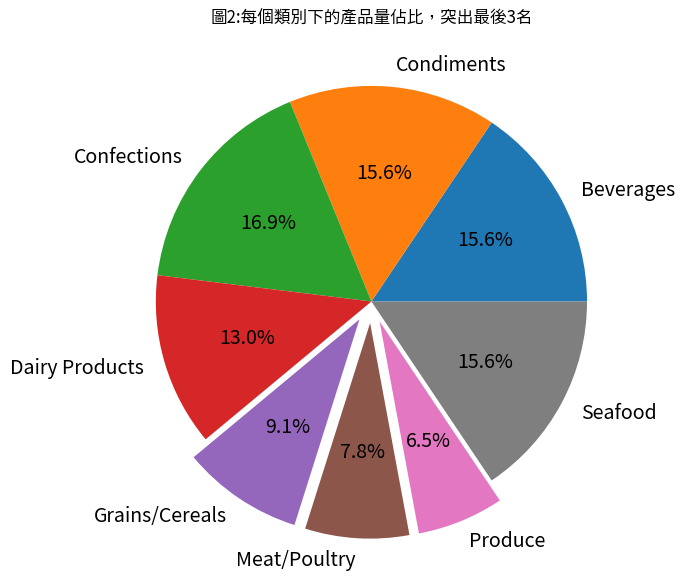

In [ ]:
#(2) 畫餅狀圖：每個類別下的產品量佔比，突顯最後3名
df13['產品量佔比'].plot(kind='pie',labels=df13['CategoryName'],autopct='%.1f%%',figsize=(7,7),fontsize=14,
                explode=[0,0,0,0,0.1,0.1,0.1,0])
plt.title('圖2:每個類別下的產品量佔比，突出最後3名')
plt.ylabel('')
plt.show()

---
# **3.第3個分析【員工表現的強弱項分析】：找出A公司員工業務表現(銷售總額)最好的前3名，後3名**

讀取自己雲端的檔案

In [ ]:
#(1)【強項分析】：加上名次，列出全部員工的前3名
# 『銷售總額，名次』都沒有小數點
df11=df3.merge(df5,on='EmployeeID')
df12=df11.merge(df4,on='OrderID')
df12['Totalsale']=df12['UnitPrice']*df12['Quantity']
df12=df12.groupby(['EmployeeID','FirstName','LastName']).agg({'Totalsale':'sum'})\
.reset_index()\
.sort_values('Totalsale',ascending=False)\
.rename(columns={'Totalsale':'銷售總額'})
df12['名次']=df12['銷售總額'].rank(ascending=False)
df12.head(3).style.format('{:.0f}',subset=['銷售總額','名次'])



,EmployeeID,FirstName,LastName,銷售總額,名次
3,4,Margaret,Peacock,250187,1
2,3,Janet,Leverling,213051,2
0,1,Nancy,Davolio,202144,3


In [ ]:
#(2)【弱項分析】：加上名次，列出全部員工的後3名
# 『銷售總額，名次』都沒有小數點
df11=df3.merge(df5,on='EmployeeID')
df12=df11.merge(df4,on='OrderID')
df12['Totalsale']=df12['UnitPrice']*df12['Quantity']
df12=df12.groupby(['EmployeeID','FirstName','LastName']).agg({'Totalsale':'sum'})\
.reset_index()\
.sort_values('Totalsale',ascending=False)\
.rename(columns={'Totalsale':'銷售總額'})
df12['名次']=df12['銷售總額'].rank(ascending=False)
df12.tail(3).style.format('{:.0f}',subset=['銷售總額','名次'])


,EmployeeID,FirstName,LastName,銷售總額,名次
8,9,Anne,Dodsworth,82964,7
5,6,Michael,Suyama,78198,8
4,5,Steven,Buchanan,75568,9


In [ ]:
#(3)【強項分析】比較不同國家的員工，列出銷售總額的前3名
# 『銷售總額，名次』都沒有小數點
df11=df3.merge(df5,on='EmployeeID')
df12=df11.merge(df4,on='OrderID')
df12['Totalsale']=df12['UnitPrice']*df12['Quantity']
df12=df12.groupby(['Country','EmployeeID','FirstName','LastName']).agg({'Totalsale':'sum'})\
.sort_values('Totalsale',ascending=False)\
.rename(columns={'Totalsale':'銷售總額'})\
.groupby(['Country']).head(3)
df12['名次']=df12['銷售總額'].rank(ascending=False)
df12.style.format('{:,.0f}',subset=['銷售總額','名次'])

Text(0.5, 1.0, 'Fig3:比較員工的銷售總額，由高到低排序')

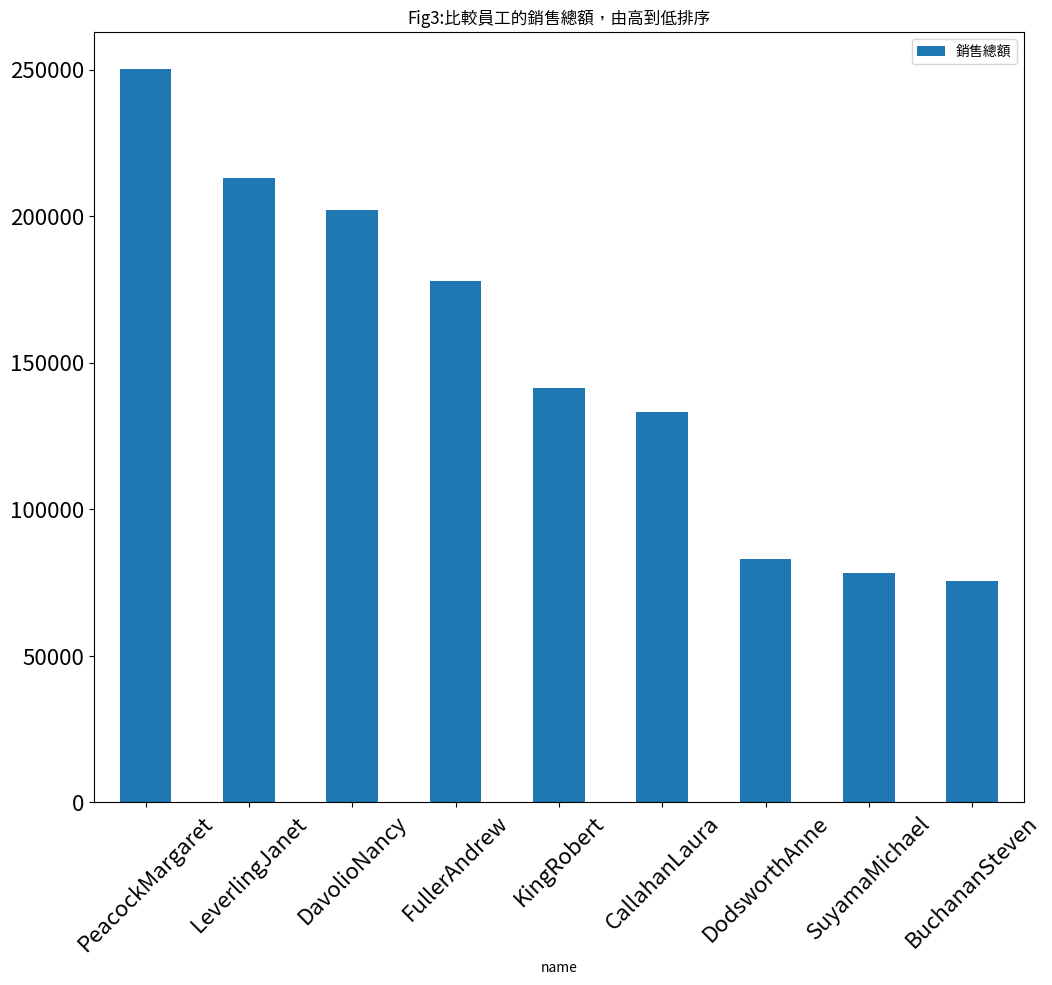

In [ ]:
#(4)【繪柱狀圖】：比較全部員工的銷售總額，由高到低排序
df11=df3.merge(df5,on='EmployeeID')
df12=df11.merge(df4,on='OrderID')
df12['Totalsale']=df12['UnitPrice']*df12['Quantity']
df12=df12.groupby(['Country','EmployeeID','FirstName','LastName']).agg({'Totalsale':'sum'})\
.sort_values('Totalsale',ascending=False)\
.rename(columns={'Totalsale':'銷售總額'})
df12['名次']=df12['銷售總額'].rank(ascending=False)
df12.style.format('{:.0f}',subset=['銷售總額','名次'])
df12=df12.reset_index()
df12['name']=df12['LastName']+df12['FirstName']
df12.plot(kind='bar',x='name',y='銷售總額',rot=45,figsize=(12,10),fontsize=16)
plt.title('Fig3:比較員工的銷售總額，由高到低排序')

---
# **4.第4個分析【產品銷售的強弱項分析】：找出A公司所有產品裡面，銷售數量最好的5名，銷售總額最好的前5名**

讀取自己雲端的檔案

In [ ]:
#(1)【產品銷量的強項分析】：『銷售總額，名次』都沒有小數點，『銷售總額格式是千分位』
# 補充：如何同時設定【小數點格式與千分位格式】：df.style.format({:,.1f}",subset=["欄位"]))
df11=df4.merge(df6,on='ProductID')
df11['銷售總額']=df11['UnitPrice_x']*df11['Quantity']
df11=df11.groupby(['ProductID','ProductName']).agg({'銷售總額':'sum'})\
.sort_values('銷售總額',ascending=False).head(5)
df11['名次']=df11['銷售總額'].rank(ascending=False)
df11.style.format('{:,.0f}',subset=['銷售總額','名次'])

,,銷售總額,名次
ProductID,ProductName,,
38,Cte de Blaye,"149,984",1
29,Thringer Rostbratwurst,"87,736",2
59,Raclette Courdavault,"76,296",3
60,Camembert Pierrot,"50,286",4
62,Tarte au sucre,"49,828",5


In [ ]:
#(2)【產品銷量的弱項分析】：『銷售總額，名次』都沒有小數點，『銷售總額格式是千分位』
df11=df4.merge(df6,on='ProductID')
df11['銷售總額']=df11['UnitPrice_x']*df11['Quantity']
df11=df11.groupby(['ProductID','ProductName']).agg({'銷售總額':'sum'})\
.sort_values('銷售總額',ascending=False)
df11['名次']=df11['銷售總額'].rank(ascending=False)
df11.tail(5).sort_values('名次',ascending=False)\
.style.format('{:,.0f}',subset=['銷售總額','名次'])



,,銷售總額,名次
ProductID,ProductName,,
48,Chocolade,"1,543",77
33,Geitost,"1,714",76
15,Genen Shouyu,"1,814",75
67,Laughing Lumberjack Lager,"2,562",74
74,Longlife Tofu,"2,566",73


In [ ]:
#(3)探討【不同產品類別，其產品銷量的強項分析】，列出各類別的前3名,沒有小數點，加上千分位
df11=df1.merge(df6,on='CategoryID')
df11=df11.merge(df4,on='ProductID')
df11['銷售總額']=df11['UnitPrice_y']*df11['Quantity']
df12 = df11.groupby(['CategoryID','ProductID','ProductName'])\
.agg({'銷售總額':'sum'})\
.sort_values(['CategoryID','銷售總額'],ascending=[True,False])
df12.groupby('CategoryID').head(3)\
.style.format('{:,.0f}',subset=['銷售總額']).set_caption('Table 4-3：列出不同產品類別，其銷售金額的前3名')

---
# **5.第5個分析【活躍客戶分析】：找出A企業至少下過20個訂單的客戶**

#目的：找出A公司的活躍客戶(不斷重複下單)

讀取自己雲端的檔案

In [ ]:
#(1)分群統計：至少下過20個訂單的客戶（加上表格標題）
df11=df2.merge(df5,on='CustomerID')
df11=df11.groupby(['CustomerID','CompanyName']).agg({'OrderID':'count'})\
.reset_index()\
.rename(columns={'OrderID':'下單次數'})
a1=df11['下單次數']>=20
df11[a1].sort_values('下單次數',ascending=False)\
.style.set_caption('表5：至少下過20個訂單的客戶名單')


,CustomerID,CompanyName,下單次數
68,SAVEA,Save-a-lot Markets,31
19,ERNSH,Ernst Handel,30
60,QUICK,QUICK-Stop,28


---
# **6.第6個分析【活躍客戶分析】：找出至少向A公司購買過50種不同產品的客戶資料**
#目的：找出A公司的活躍客戶，或喜歡本公司產品的客戶（購買多種產品）

讀取自己雲端的檔案

In [ ]:
#(6-1)至少向A公司購買過50個產品的客戶資料
df11=df2.merge(df5,on='CustomerID')
df11=df11.merge(df4,on='OrderID')
df11=df11.groupby(['CustomerID','CompanyName']).agg({'Quantity':'count'})\
.reset_index()\
.rename(columns={'Quantity':'購買產品數量'})
a1=df11['購買產品數量']>=50
df11[a1].sort_values('購買產品數量',ascending=False)\
.style.set_caption('表6-1：至少購買過50個產品的客戶名單')

,CustomerID,CompanyName,購買產品數量
68,SAVEA,Save-a-lot Markets,116
19,ERNSH,Ernst Handel,102
60,QUICK,QUICK-Stop,86
62,RATTC,Rattlesnake Canyon Grocery,71
35,HUNGO,Hungry Owl All-Night Grocers,55
4,BERGS,Berglunds snabbkp,52


In [ ]:
#(6-2)至少向A公司購買過50種不同產品的客戶資料
df11=df2.merge(df5,on='CustomerID')
df11=df11.merge(df4,on='OrderID')
df11=df11.groupby(['CustomerID','CompanyName']).agg({'ProductID':'nunique'})\
.reset_index()\
.rename(columns={'ProductID':'購買產品數量'})
a1=df11['購買產品數量']>=50
df11[a1].sort_values('購買產品數量',ascending=False)\
.style.set_caption('表6-2：至少購買過不同50個產品的客戶名單')

,CustomerID,CompanyName,購買產品數量
19,ERNSH,Ernst Handel,56
68,SAVEA,Save-a-lot Markets,53


---
# **7.第7個分析【產品銷量程度分級】：根據訂單數量為產品來分類，新增欄位：**
#(1)目的：將A公司產品，進行分類【銷量差，銷量普通，銷量好】
若產品的訂單數量<10，則標示『銷量差』

若產品的訂單數量<=20 而且>=10，則標示『銷量普通』

若產品的訂單數量>20，則標示『銷量好』

---
#(2)【產品銷量等級】==>計算『產品』的『訂單數量』

讀取自己雲端的檔案

In [ ]:
#(4)根據訂單數量為產品來分類，新增欄位：【產品銷量等級】
df11=df4.merge(df6,on='ProductID')
df11=df11.groupby(['ProductID','ProductName'])\
.agg({'Quantity':'count'})\
.rename(columns={'Quantity':'銷量'})\
.reset_index()
df11['產品銷量等級']=df11['銷量'].apply(lambda x: '銷量差' if x<10 else ('銷量普通' if 10<=x<=20 else '銷量好'))
df11

,ProductID,ProductName,銷量,產品銷量等級
0,1,Chai,38,銷量好
1,2,Chang,44,銷量好
2,3,Aniseed Syrup,12,銷量普通
3,4,Chef Anton's Cajun Seasoning,20,銷量普通
4,5,Chef Anton's Gumbo Mix,10,銷量普通
...,...,...,...,...
72,73,Rd Kaviar,14,銷量普通
73,74,Longlife Tofu,13,銷量普通
74,75,Rhnbru Klosterbier,46,銷量好
75,76,Lakkalikri,39,銷量好


---
# **8.第8個分析【潛在市場分析】：找出尚未購買Beverages類別產品的客戶名單**
#本公司銷售佔比最大的類別是Beverages飲料，
#請找出尚未購買Beverages類別產品的客戶
#請列出這些客戶的ID和公司名稱。

讀取自己雲端的檔案

In [ ]:
df11 = df2.merge(df5, how='left',on='CustomerID')
df11 = df11.merge(df4,how='left', on='OrderID')
df11 = df11.merge(df6, how='left',on='ProductID')
df11 = df11.merge(df1,how='outer',on='CategoryID')
a1=df11['CategoryName']=='Beverages'
df11=df11[a1]
df11=df11.groupby(['CustomerID','CompanyName']).agg({'OrderID':'size'})\
.reset_index()
df12=df2.merge(df11,on='CustomerID',how='left')
a2=df12['OrderID'].isnull()
df12=df12[a2][['CustomerID','CompanyName_x','OrderID']]
df12.columns=['CustomerID','CompanyName','OrderID']
df12.style.set_caption('表8：列出尚未購買Beverages類別產品的客戶')

,CustomerID,CompanyName,OrderID
12,CENTC,Centro comercial Moctezuma,nan
14,COMMI,Comrcio Mineiro,nan
21,FISSA,FISSA Fabrica Inter. Salchichas S.A.,nan
26,FRANS,Franchi S.p.A.,nan
35,HUNGC,Hungry Coyote Import Store,nan
42,LAZYK,Lazy K Kountry Store,nan
56,PARIS,Paris spcialits,nan
83,Val2,IT,nan
84,VALON,IT,nan
86,VINET,Vins et alcools Chevalier,nan


---
---
---
# 二、分析第2個數據集：B公司的業務銷售之分析報告
檔案：https://acupun.site/lecture/pandas/example/resource/sales.csv



---

# 2.內容：你是A公司的新進商業數據分析師，A公司今年2016年業績大幅下滑，公司想請你分析歷年數據後，寫份摘要報告，從各種不同角度分析，包括：『不同業務單位，不同業務員，不同產品，逐年，每季，每月』的分析，找出業績下降的原因，以及如何改善。
# **請多用定量描述的方式，來證明你分析觀點的可靠性、準確性與權威性，以建立個人數據分析的品牌與形象。**
# 3.使用技術：分群技術(groupby），樞紐分析表，交叉分析圖（groupby..agg..unstack)，視覺化(matplotlib)。三種百分比表格來定量分析各種數據的物理意義。groupby..apply做樞紐分析表格的視覺化標註。分群+排序做強弱項分析。

---
#**9.第9個分析【時間效應分析】：統計B公司的『逐年、逐月』的銷售金額，並繪柱狀圖**

下載檔案：https://acupun.site/lecture/pandas/example/resource/sales.csv

將檔案上傳到雲端硬碟，讀取自己雲端的檔案

In [ ]:
df2_1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales.csv')
df2_1['年']=pd.to_datetime(df2_1['銷售日期'])
df2_1['年']=df2_1['年'].dt.year
df2_1['月']=pd.to_datetime(df2_1['銷售日期'])
df2_1['月']=df2_1['月'].dt.month

In [ ]:
#(1)統計此公司的『逐年』的銷售金額
df11=df2_1.groupby('年').agg({'銷售金額':'sum'})\
.reset_index().style.format('{:,.0f}',subset='銷售金額')
df11

,年,銷售金額
0,2013,"25,727,805"
1,2014,"22,838,772"
2,2015,"28,060,594"
3,2016,"19,239,669"


Text(0.5, 1.0, 'Fig 1-1:A公司的逐年銷售金額')

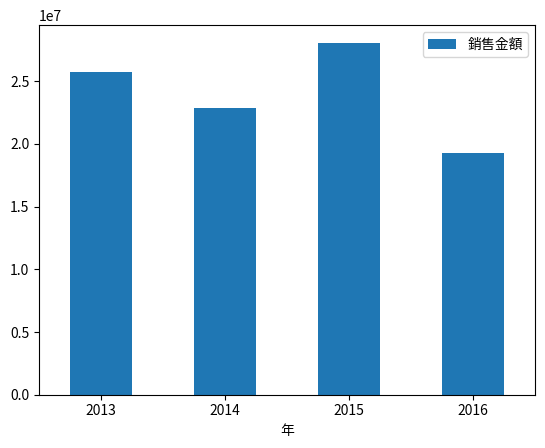

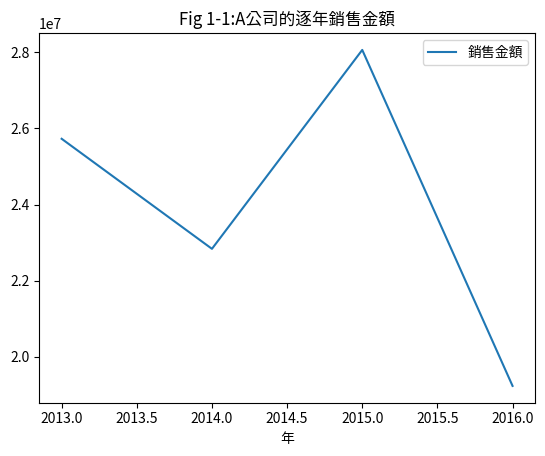

In [ ]:
#(2)【逐年】繪圖
df11=df2_1.groupby('年').agg({'銷售金額':'sum'})\
.reset_index()

df11.plot(kind='bar',x='年',y='銷售金額',rot=0)
df11.plot(kind='line',x='年',y='銷售金額',rot=0).set_title('Fig 1-1:A公司的逐年銷售金額')

In [ ]:
#(3)統計此公司的『逐年、逐月』的銷售金額
df11=df2_1.groupby(['年','月']).agg({'銷售金額':'sum'})\
.reset_index().style.format('{:,.0f}',subset=['銷售金額'])
df11

,年,月,銷售金額
0,2013,1,"2,403,639"
1,2013,2,"2,965,207"
2,2013,3,"1,452,076"
3,2013,4,"1,811,923"
4,2013,5,"2,046,698"
5,2013,6,"2,917,171"
6,2013,7,"3,109,491"
7,2013,8,"2,045,607"
8,2013,9,"1,798,154"
9,2013,10,"2,484,518"


<Axes: xlabel='年月'>

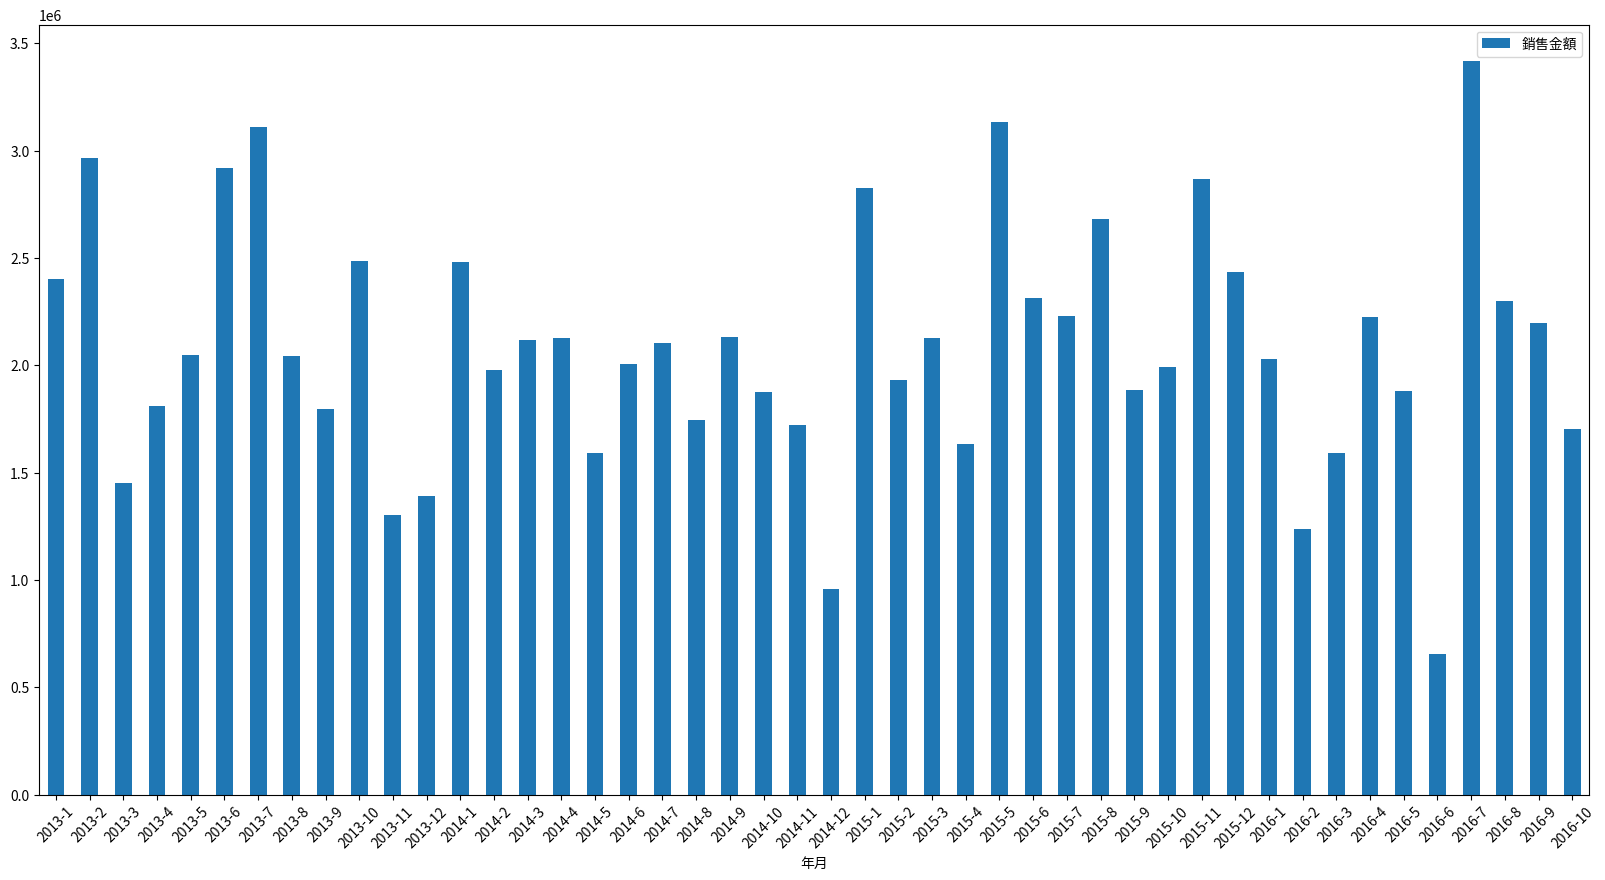

In [ ]:
#(4)【逐年逐月】繪圖
df11=df2_1.groupby(['年','月']).agg({'銷售金額':'sum'})\
.reset_index()
df11['年月']=df11['年'].astype(str)+'-'+df11['月'].astype(str)
df11.plot(kind='bar',x='年月',y='銷售金額',figsize=(20,10),rot=45)

---
# **10.第10個分析【樞紐分析】：統計B公司本年度，每個業務單位的『銷售總量，銷售總金額』**

下載檔案：https://acupun.site/lecture/pandas/example/resource/sales.csv

將檔案上傳到雲端硬碟，讀取自己雲端的檔案

In [ ]:
#(1)分析：每個業務單位的『銷售總量，銷售總金額』
df11=df2_1.groupby('業務單位').agg({'銷售數量':'sum','銷售金額':'sum'})\
.rename(columns={'銷售數量':'銷售總量','銷售金額':'銷售總金額'})
df11

,銷售總量,銷售總金額
業務單位,,
業務1,2901936,41849234
業務2,3063210,18533423
業務3,2979484,17242096
業務4,2935313,18242087


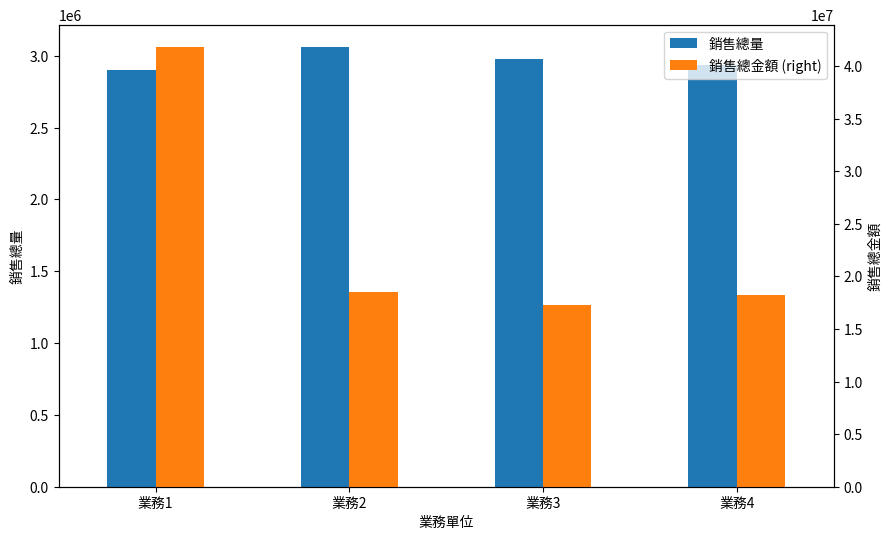

In [ ]:
#(2)繪圖：標註左右刻度
ax=df11.plot(kind="bar",legend=True, rot=0,secondary_y='銷售總金額', figsize=(10,6))
ax.set_xlabel('業務單位')
ax.set_ylabel('銷售總量')
ax.right_ax.set_ylabel('銷售總金額')
plt.show()


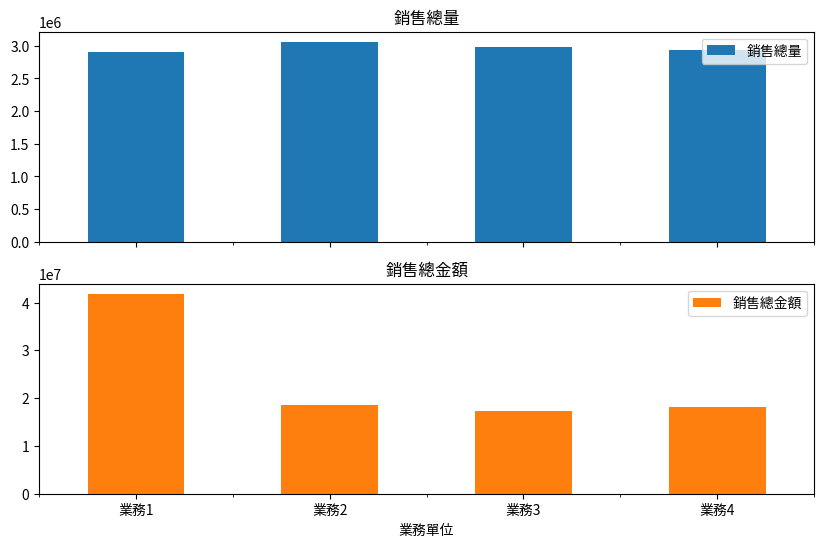

In [ ]:
#(3)繪圖：分割成上下圖
df11.plot(kind="bar",legend=True, subplots=True ,rot=0, figsize=(10,6))
plt.xlabel('業務單位')
plt.show()

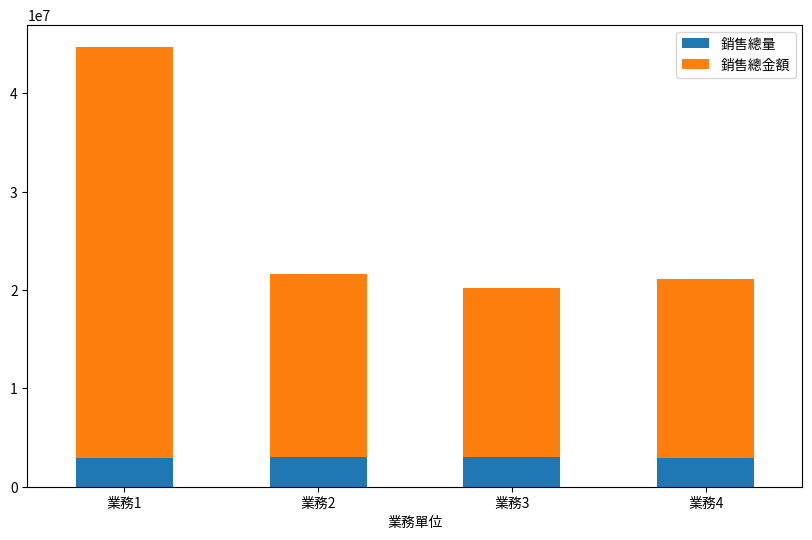

In [ ]:
#(4)繪圖：堆疊圖
df11.plot(kind="bar",legend=True, stacked=True ,rot=0, figsize=(10,6))
plt.xlabel('業務單位')
plt.show()

---
#**11.第11個分析【依照性別做強弱項分析】：每一位業務員的年度銷售總金額，排序，高到低**

讀取自己雲端的檔案

In [ ]:
#(1)根據『男女/業務員』分群，顯示『銷售數量，銷售金額』，
#再依照銷售金額排序（高到低），並標註名次：
df11=df2_1.groupby(['性別','業務員']).agg({'銷售數量':'sum','銷售金額':'sum'})
df11['名次']=df11['銷售金額'].rank(ascending=False)
df11=df11.sort_values(['性別', '銷售金額','名次'],ascending=[False, False, True])
df11.style.format('{:,.0f}',subset=['銷售數量','銷售金額','名次'])

In [ ]:
#(2)強項分析：找出男生最強前3，女生最強前3
df11=df2_1.groupby(['性別','業務員']).agg({'銷售數量':'sum','銷售金額':'sum'})
df11['名次']=df11['銷售金額'].rank(ascending=False)
df11=df11.sort_values(['性別', '銷售金額','名次'],ascending=[False, False, True])
df11=df11.groupby('性別').head(3)
df11.style.format('{:,.0f}',subset=['銷售數量','銷售金額','名次'])

In [ ]:
#(3)弱項分析：找出男生最弱3名，女生最弱3名
df11=df2_1.groupby(['性別','業務員']).agg({'銷售數量':'sum','銷售金額':'sum'})
df11['名次']=df11['銷售金額'].rank(ascending=False)
df11=df11.sort_values(['性別', '銷售金額','名次'],ascending=[False, False, True])
df11=df11.groupby('性別').tail(3)
df11.style.format('{:,.0f}',subset=['銷售數量','銷售金額','名次'])

---
#**12.第12個分析【依照業務單位做強弱項分析】：每一位業務員的年度銷售總金額，排序，高到低**

讀取自己雲端的檔案

In [ ]:
#(1)根據『業務單位/業務員』分群，顯示『銷售數量，銷售金額』，
#再依照銷售金額排序（高到低），並標註名次：
df11=df2_1.groupby(['業務單位','業務員']).agg({'銷售數量':'sum','銷售金額':'sum'})
df11['名次']=df11['銷售金額'].rank(ascending=False)
df11=df11.sort_values(['業務單位', '銷售金額','名次'],ascending=[False, False, True])
df11.style.format('{:,.0f}',subset=['銷售數量','銷售金額','名次'])

In [ ]:
#(2)強項分析：找出每個單位最強前2
df11=df2_1.groupby(['業務單位','業務員']).agg({'銷售數量':'sum','銷售金額':'sum'})
df11['名次']=df11['銷售金額'].rank(ascending=False)
df11=df11.sort_values(['業務單位', '銷售金額','名次'],ascending=[False, False, True])
df11=df11.groupby('業務單位').head(2).sort_values('業務單位')
df11.style.format('{:,.0f}',subset=['銷售數量','銷售金額','名次'])

---
# **13.第13個分析【樞紐分析表的定量分析】：交叉分析『業務單位，銷售產品』的銷售金額，並從各個角度，做出各種定量分析**

讀取自己雲端的檔案

In [ ]:
#(1)計算『業務銷售總和，產品銷售總和』，加上表格標題
df2_1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales.csv')
df11=df2_1.pivot_table(columns="銷售產品",index="業務單位",
            values="銷售金額",aggfunc="sum")
df11.columns.name = "產品銷售金額"
df11.loc['產品銷售總和']=df11.sum()
df11['業務銷售總額']=df11.sum(axis=1)
df11.style.format('{:,.0f}').set_caption('表13-1:計算總和')

產品銷售金額,平板,手機,鍵盤,電腦,業務銷售總額
業務單位,,,,,
業務1,"11,293,148","13,154,647","7,825,479","9,575,960","41,849,234"
業務2,"4,818,464","5,503,935","3,429,055","4,781,969","18,533,423"
業務3,"3,605,371","5,973,702","3,730,727","3,932,296","17,242,096"
業務4,"4,233,983","8,016,938","2,660,749","3,330,417","18,242,087"
產品銷售總和,"23,950,966","32,649,222","17,646,010","21,620,642","95,866,840"


In [ ]:
#(2)定量分析：『總計百分比表格』（加上表格標題，1位小數點）
df2_1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales.csv')
df11=df2_1.pivot_table(columns="銷售產品",index="業務單位",
            values="銷售金額",aggfunc="sum")
df11.columns.name = "產品銷售金額"
df11.loc['產品銷售總和']=df11.sum()
df11['業務銷售總額']=df11.sum(axis=1)
df11=(df11/df11.iloc[-1][-1]*100).round(1)
df11.style.format('{:.1f}').set_caption('表13-2:總計百分比')

產品銷售金額,平板,手機,鍵盤,電腦,業務銷售總額
業務單位,,,,,
業務1,11.8,13.7,8.2,10.0,43.7
業務2,5.0,5.7,3.6,5.0,19.3
業務3,3.8,6.2,3.9,4.1,18.0
業務4,4.4,8.4,2.8,3.5,19.0
產品銷售總和,25.0,34.1,18.4,22.6,100.0


In [ ]:
#(3)定量分析：『欄的總和百分比』（加上表格標題，1位小數點）
df2_1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales.csv')
df11=df2_1.pivot_table(columns="銷售產品",index="業務單位",
            values="銷售金額",aggfunc="sum")
df11.columns.name = "產品銷售金額"
df11.loc['產品銷售總和']=df11.sum()
df11['業務銷售總額']=df11.sum(axis=1)
df11=(df11.div(df11.loc["產品銷售總和"],axis=1)*100).round(1)
df11.style.format('{:.1f}').set_caption('表13-3:欄的總和百分比')

產品銷售金額,平板,手機,鍵盤,電腦,業務銷售總額
業務單位,,,,,
業務1,47.2,40.3,44.3,44.3,43.7
業務2,20.1,16.9,19.4,22.1,19.3
業務3,15.1,18.3,21.1,18.2,18.0
業務4,17.7,24.6,15.1,15.4,19.0
產品銷售總和,100.0,100.0,100.0,100.0,100.0


In [ ]:
#(4)定量分析：『列的總和百分比』（加上表格標題，1位小數點）
df2_1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales.csv')
df11=df2_1.pivot_table(columns="銷售產品",index="業務單位",
            values="銷售金額",aggfunc="sum")
df11.columns.name = "產品銷售金額"
df11.loc['產品銷售總和']=df11.sum()
df11['業務銷售總額']=df11.sum(axis=1)
df11=(df11.div(df11["業務銷售總額"],axis=0)*100).round(1)
df11.style.format('{:.1f}').set_caption('表13-4:列的總和百分比')

產品銷售金額,平板,手機,鍵盤,電腦,業務銷售總額
業務單位,,,,,
業務1,27.0,31.4,18.7,22.9,100.0
業務2,26.0,29.7,18.5,25.8,100.0
業務3,20.9,34.6,21.6,22.8,100.0
業務4,23.2,43.9,14.6,18.3,100.0
產品銷售總和,25.0,34.1,18.4,22.6,100.0


---
# **14.第14個分析【樞紐分析表】：分析『業務單位』的『銷售數量，銷售金額』之『最高，最低，平均，總和』，且【加上千分位】**

讀取自己雲端的檔案

In [ ]:
#(1)分析『業務單位』的『銷售數量，銷售金額』之『最高，最低，平均，總和』，且【加上千分位】
df2_1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales.csv')
df11=df2_1.groupby("業務單位")\
.agg({"銷售數量":["max","min","mean","sum"],"銷售金額":["max","min","mean","sum"]})
df11 = df11.rename(columns={'max': '最高', 'min': '最低', 'mean': '平均', 'sum': '總和'}, level=1)
df11.style.format('{:,.0f}')

In [ ]:
#(2)分析『業務單位』的『銷售數量，銷售金額』之『平均』，且【加上千分位】
df11=df2_1.groupby("業務單位")\
.agg({"銷售數量":["mean"],"銷售金額":["mean"]})
df11 = df11.rename(columns={'mean':'平均'},level=1)
df11.style.format('{:,.0f}')

,銷售數量,銷售金額
,平均,平均
業務單位,,
業務1,"12,728","183,549"
業務2,"13,435","81,287"
業務3,"12,843","74,319"
業務4,"14,112","87,702"


---
# **15.第15個分析【時間效應分析】：【一年四季】的銷售金額之交叉分析【年 vs 季】，且【加上千分位】**

讀取自己雲端的檔案

In [ ]:
#(1)做時間效應【一年四季】的銷售金額之交叉分析【年 vs 季】，且【加上千分位】
df2_1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales.csv')
df2_1['年']=pd.to_datetime(df2_1['銷售日期'])
df2_1['年']=df2_1['年'].dt.year
df2_1['月']=pd.to_datetime(df2_1['銷售日期'])
df2_1['月']=df2_1['月'].dt.month
df2_1['季度']=pd.to_datetime(df2_1['銷售日期'])
df2_1['季度']=df2_1['季度'].dt.quarter

In [ ]:
df11 = df2_1.pivot_table(columns="季度", index="年", values="銷售金額", aggfunc="sum")
df11.columns = ['Q1', 'Q2', 'Q3', 'Q4']
df11.columns.name = '銷售金額'
df11.style.format('{:,.0f}')

銷售金額,Q1,Q2,Q3,Q4
年,,,,
2013,"6,820,922","6,775,792","6,953,252","5,177,839"
2014,"6,578,504","5,725,217","5,977,272","4,557,779"
2015,"6,886,600","7,077,588","6,801,437","7,294,969"
2016,"4,860,532","4,761,136","7,913,957","1,704,044"


<Axes: xlabel='年'>

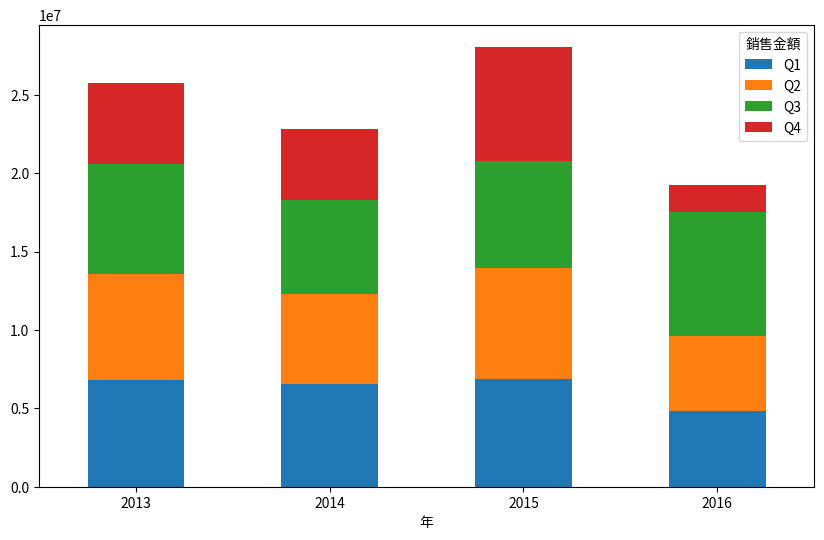

In [ ]:
#(2)繪圖：堆疊圖【年 vs 季】，且【加上千分位】
df11.plot(kind="bar",legend=True, stacked=True ,rot=0, figsize=(10,6))

Text(0.5, 1.0, '圖1:每年四季的銷售金額')

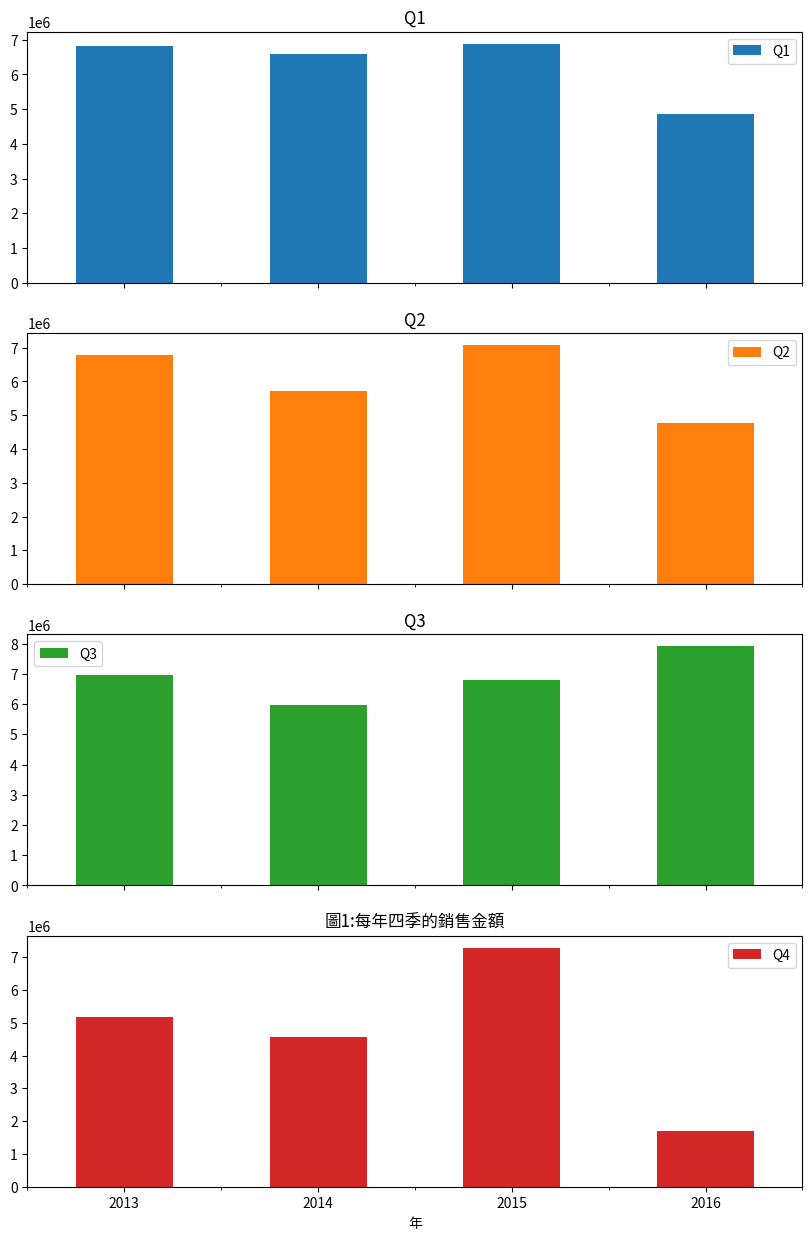

In [ ]:
#(3)繪圖：分割圖【年 vs 季】
df11.plot(kind="bar",legend=True, subplots=True ,rot=0, figsize=(10,15))
plt.title('圖1:每年四季的銷售金額')

---
# **16.第16個分析【時間效應分析】：月份對銷售金額之影響：**

讀取自己雲端的檔案

Text(0.5, 1.0, '圖1:月份對銷售金額之影響')

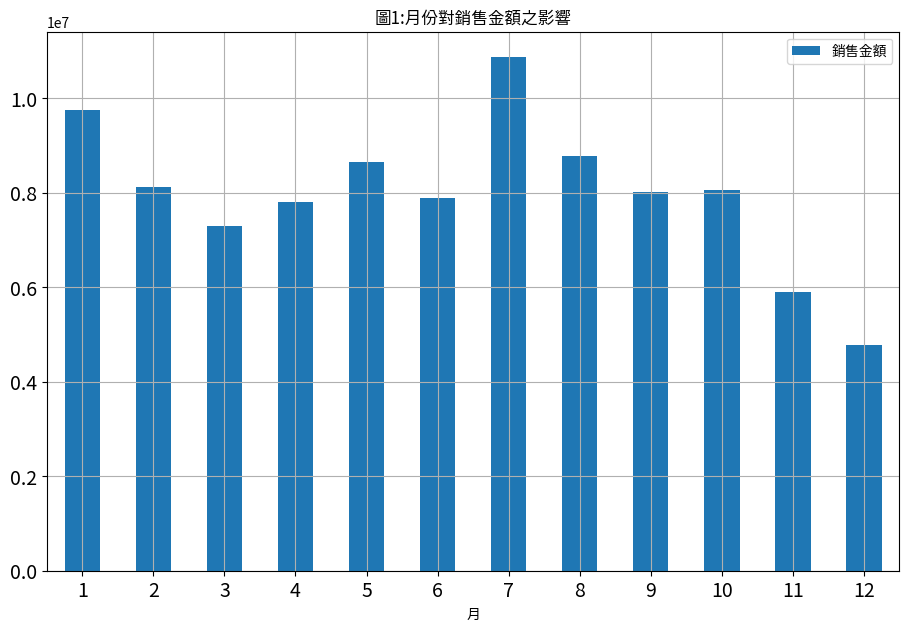

In [ ]:
#(1)月份對銷售金額之影響：
df11=df2_1.groupby('月').agg({'銷售金額':'sum'})\
.reset_index()
df11.plot(kind='bar',x='月',y='銷售金額',figsize=(11,7), rot=0, fontsize=14)
plt.grid()
plt.title('圖1:月份對銷售金額之影響')

---
# **17.第17個分析【時間效應分析】：分析在2013～2014年8個季節的業績表現，B公司每個業務單位的業績表現，且【加上千分位】**

讀取自己雲端的檔案

In [ ]:
#(1)只顯示(2013～2014年)8個季節，B公司每個業務單位的業績表現，且【加上千分位】
df2_1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales.csv')
df2_1['年']=pd.to_datetime(df2_1['銷售日期']).dt.year
df2_1 = df2_1[df2_1['年'].isin([2013, 2014])]
df2_1['月']=pd.to_datetime(df2_1['銷售日期'])
df2_1['月']=df2_1['月'].dt.month
df2_1['季']=pd.to_datetime(df2_1['銷售日期'])
df2_1['季']=df2_1['季'].dt.quarter

df11=df2_1.groupby(['年','業務單位','季']).agg({'銷售金額':'sum'})
df11 = df11.pivot_table(columns="業務單位", index=["年","季"], values="銷售金額", aggfunc="sum")
df11.columns.name = '各單位銷售金額'
df11.style.format('{:,.0f}')



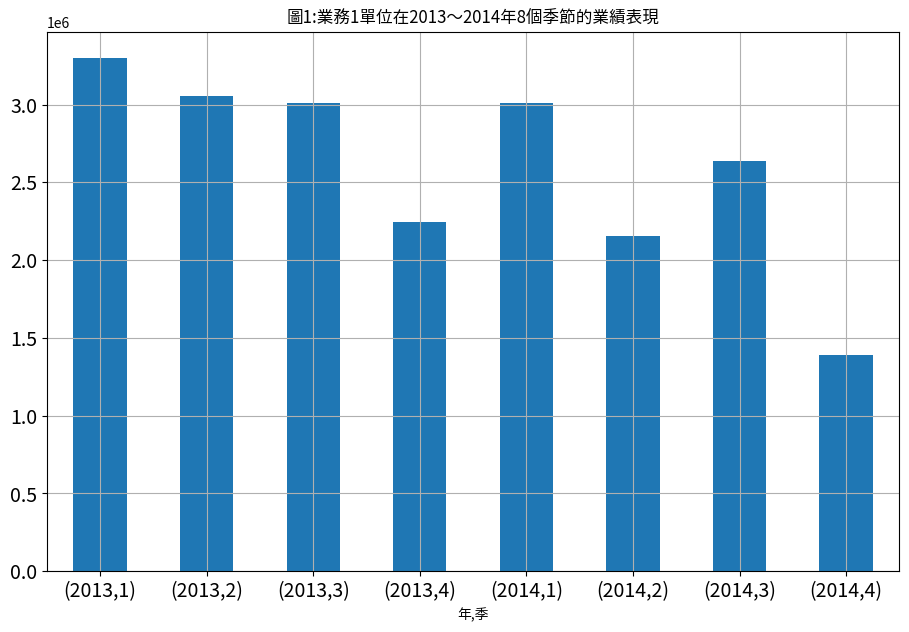

In [ ]:
#(2)繪圖：【業務1單位】在2013～2014年8個季節的業績表現
df11 = df11.reset_index()
df11['年,季'] = '('+df11['年'].astype(str) +','+df11['季'].astype(str)+')'
df11.plot(kind='bar',x='年,季',y='業務1',legend=False,figsize=(11,7), rot=0, fontsize=14)
plt.grid()
plt.title('圖1:業務1單位在2013～2014年8個季節的業績表現')
plt.show()

---
# **18.第18個分析【時間效應分析】：畫圖：分析產品『手機』，在2013～2014年8個季節，每季的業績表現，且【加上千分位】**

讀取自己雲端的檔案

In [ ]:
#(1)只顯示2013～2014年8個季節，B公司銷售產品的業績表現，且【加上千分位】
df2_1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales.csv')
df2_1['年']=pd.to_datetime(df2_1['銷售日期']).dt.year
df2_1 = df2_1[df2_1['年'].isin([2013, 2014])]
df2_1['月']=pd.to_datetime(df2_1['銷售日期'])
df2_1['月']=df2_1['月'].dt.month
df2_1['季']=pd.to_datetime(df2_1['銷售日期'])
df2_1['季']=df2_1['季'].dt.quarter

df11=df2_1.groupby(['年','銷售產品','季']).agg({'銷售金額':'sum'})
df11 = df11.pivot_table(columns="銷售產品", index=["年","季"], values="銷售金額", aggfunc="sum")
df11.columns.name = '各產品銷售金額'
df11.style.format('{:,.0f}')


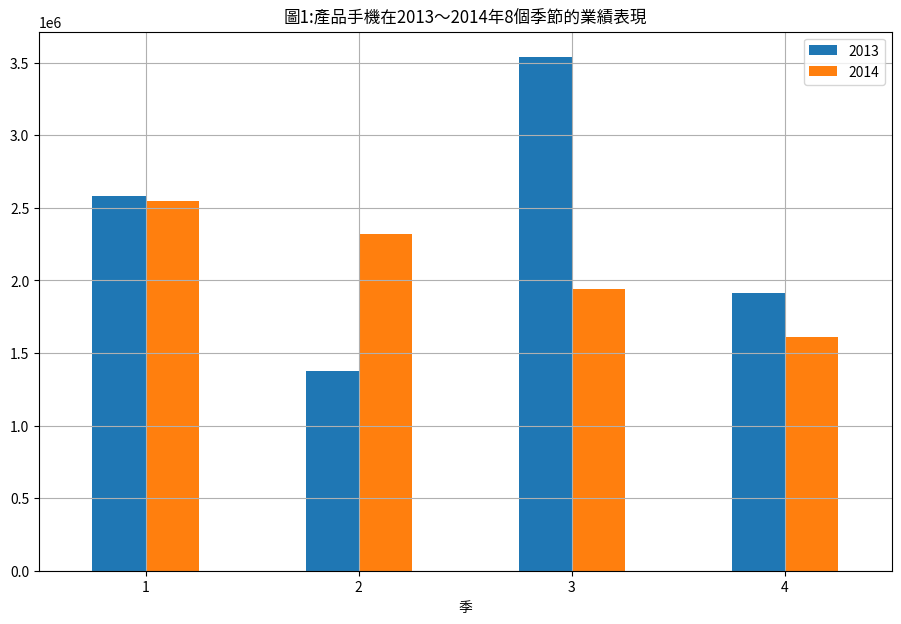

In [ ]:
#(2)繪圖：產品【手機】在2013～2014年8個季節的業績表現
df2_1 = df2_1[df2_1['銷售產品'].isin(['手機'])]
df11=df2_1.groupby(["季","年",'銷售產品']).agg({"銷售金額":"sum"})\
.unstack(level="年")

df11 = df11.reset_index()
df11.plot(kind="bar",x='季',legend=True,rot=0,figsize=(11,7))
plt.legend(['2013','2014'])
plt.xlabel("季")
plt.grid()
plt.title("圖1:產品手機在2013～2014年8個季節的業績表現")
plt.show()